# DES Y3 Gold redMaPPer Cluster Catalogue Tutorial

Author: Sunayana Bhargava

If you have any questions, please email s.bhargava@sussex.ac.uk.

Go to https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/RedMaPPer_on_Y3A2

Right-click and download linked file 'Y3A2 Gold 2.2.1 sof colors, redMaPPer v6.4.22+2, Full, lambda>20'

The username and password required to access the download is the usual DES one.

In [53]:
#Import the relevant Python FITS reader. We are using astropy

from astropy.io import fits
import matplotlib.pyplot as plt
import csv
import numpy as np

In [54]:
#Open the data file. Adjust the path accordingly based on where your downloaded catalogue is located.

fits1=fits.open('/Users/sb765/Downloads/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl50_catalog.fit')

In [55]:
#Check the data type

type(fits1)

astropy.io.fits.hdu.hdulist.HDUList

In [56]:
#Check the data columns

fits1[1].columns

ColDefs(
    name = 'MEM_MATCH_ID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'MODEL_MAG'; format = '4E'
    name = 'MODEL_MAGERR'; format = '4E'
    name = 'REFMAG'; format = 'E'
    name = 'REFMAG_ERR'; format = 'E'
    name = 'ZRED'; format = 'E'
    name = 'ZRED_E'; format = 'E'
    name = 'ZRED_CHISQ'; format = 'E'
    name = 'BCG_SPEC_Z'; format = 'E'
    name = 'Z_SPEC_INIT'; format = 'E'
    name = 'Z_INIT'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'LAMBDA_CHISQ'; format = 'E'
    name = 'LAMBDA_CHISQ_E'; format = 'E'
    name = 'LAMBDA_ZRED'; format = 'E'
    name = 'LAMBDA_ZRED_E'; format = 'E'
    name = 'R_LAMBDA'; format = 'E'
    name = 'SCALEVAL'; format = 'E'
    name = 'MASKFRAC'; format = 'E'
    name = 'GEOMASKFRAC'; format = 'E'
    name = 'C_LAMBDA'; format = '3E'
    name = 'C_LAMBDA_ERR'; format = '3E'
    name = 'MAG_LAMBDA_ERR'; format = '4E'
    name = 'CHISQ'; format = 'E'
    name = 'Z_LAMBDA'; format = 

In [57]:
#Define the meaningful columns as arrays. We will use cluster ID, position, redshift and richness.

data=fits1[1].data

ID=data.field('MEM_MATCH_ID')
redshift=data.field('Z_LAMBDA')
redshift_err=data.field('Z_LAMBDA_E')
richness=data.field('LAMBDA_CHISQ')
richness_err=data.field('LAMBDA_CHISQ_E')
r_lambda=data.field('R_LAMBDA')
ra=data.field('RA')
dec=data.field('DEC')

#Returns the number of RM DES Y3 clusters
print len(ID)

53610


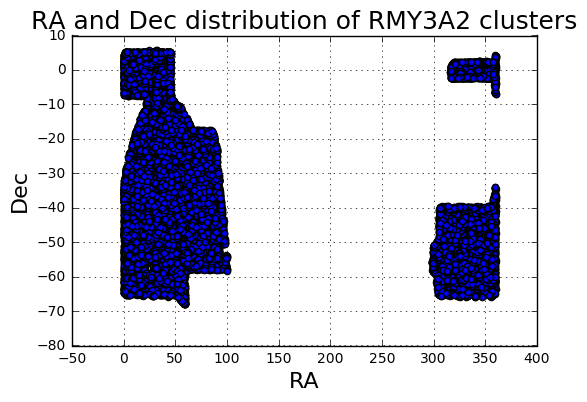

In [58]:
#Look at the distributions of the positions on the sky

plt.title('RA and Dec distribution of RMY3A2 clusters', fontsize=18)
plt.scatter(ra, dec)
plt.grid()
plt.ylabel('Dec', fontsize=16)
plt.xlabel('RA', fontsize=16)
plt.show()

In [60]:
#A sky projection of the RM clusters

#d2r= np.pi/180.0

#ra_rad=d2r*ra
#dec_rad=d2r*dec

#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection="mollweide")
#ax.scatter(ra_rad, dec_rad)
#plt.show()

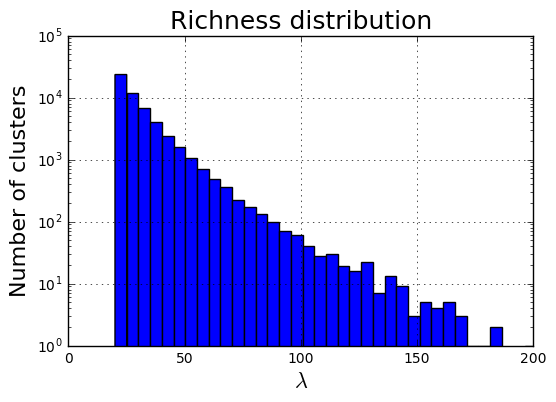

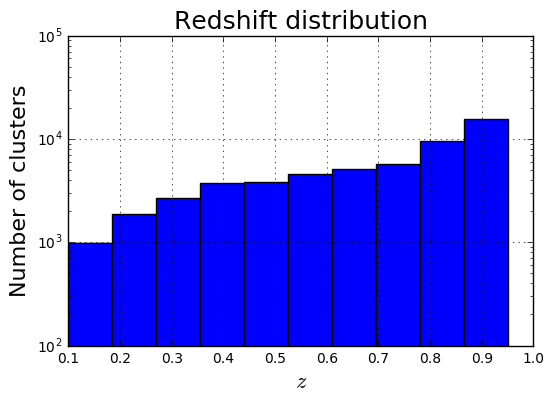

In [61]:
#Look at the redshift and richness distributions for the sample

num_bins=40
plt.title('Richness distribution', fontsize=18)
plt.grid()
plt.hist(richness, num_bins)
plt.xlim([0,200])
plt.ylabel('Number of clusters', fontsize=16)
plt.xlabel(r'$\lambda$', fontsize=16)
plt.yscale('log')
plt.show()


num_bins=10
plt.title('Redshift distribution', fontsize=18)
plt.grid()
plt.hist(redshift, num_bins)
plt.ylabel('Number of clusters', fontsize=16)
plt.xlabel(r'$z$', fontsize=16)
plt.yscale('log')
plt.show()




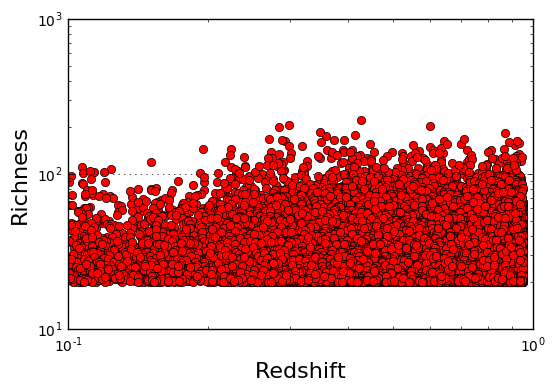

In [62]:
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.plot(redshift, richness, 'ro')
#plt.errorbar(redshift, richness, redshift_err, richness_err, fmt='ro')
plt.xlabel('Redshift', fontsize=16)
plt.ylabel('Richness', fontsize=16)
plt.show()

Now that we have done some basic explorations of the RM DES-Y3 catalogue, we are going to compare its properties with a RM catalogue on SDSS data. 

Below is a sky plot of the clusters in the RM DES-Y3 catalogue (blue) and a RM SDSS catalogue (red), highlighting the overlap in their survey footprints (mostly in a region called Stripe-82).

<img src="des-sdss-overlap.png">

The RM SDSS catalogue can be accessed here: http://risa.stanford.edu/redmapper/. The name of the file is 'redMaPPer catalog v6.3.'

In order to create a catalogue of clusters common to both DES and SDSS, some form of matching needs to be done. As a first pass, this can be done on the basis of angular separation in the sky. The average maximal separation on the sky for two clusters which are the same, is usually 3 arcminutes. It is possible to code this up in Python, however, TOPCAT is a very useful and efficient tool to get this done (http://www.star.bris.ac.uk/~mbt/topcat/)

We will start with a crossmatched catalogue between the RM DESY3 and RM SDSS clusters, matched on their respective positions (RA, Dec) within an angular separation of 3 arcminutes.

In [63]:
#Define a new catalogue in order to analyse the crossmatch. Again, change the path accordingly based on where you have downloaded your catalogue.

catalogue=fits.open('/Users/sb765/Documents/RM-DESY3-SDSS-crossmatch-3-arcmin.fits')

In [64]:
#Check the data columns. Notice the last column in the data is called 'Separation'

catalogue[1].columns

ColDefs(
    name = 'ID'; format = 'J'
    name = 'NAME'; format = '20A'
    name = 'RA_1'; format = 'D'
    name = 'DEC_1'; format = 'D'
    name = 'Z_LAMBDA_1'; format = 'E'
    name = 'Z_LAMBDA_ERR'; format = 'E'
    name = 'LAMBDA'; format = 'E'
    name = 'LAMBDA_ERR'; format = 'E'
    name = 'S'; format = 'E'
    name = 'Z_SPEC'; format = 'E'
    name = 'OBJID'; format = 'K'
    name = 'IMAG'; format = 'E'
    name = 'IMAG_ERR'; format = 'E'
    name = 'MODEL_MAG_U'; format = 'E'
    name = 'MODEL_MAGERR_U'; format = 'E'
    name = 'MODEL_MAG_G'; format = 'E'
    name = 'MODEL_MAGERR_G'; format = 'E'
    name = 'MODEL_MAG_R'; format = 'E'
    name = 'MODEL_MAGERR_R'; format = 'E'
    name = 'MODEL_MAG_I'; format = 'E'
    name = 'MODEL_MAGERR_I'; format = 'E'
    name = 'MODEL_MAG_Z'; format = 'E'
    name = 'MODEL_MAGERR_Z'; format = 'E'
    name = 'ILUM_1'; format = 'E'
    name = 'P_CEN_1'; format = '5E'
    name = 'RA_CEN'; format = '5E'
    name = 'DEC_CEN'; format = '5E'
  

In [65]:
catalogue_data=catalogue[1].data

In [66]:
separation=catalogue_data.field('Separation') #Note the units for separation is in arcseconds

In [67]:
#The list of separations between matched DES and SDSS clusters is now in the 'separation' array


We want to construct a histogram of offsets in the positions between the clusters in the SDSS and DES footprint, both of which have been detected by the Redmapper cluster finder. Below is a plot which shows this histogram published as part of DES Y1 results (https://arxiv.org/pdf/1901.07119.pdf)

<img src="des-sdss-centering-distribution.png" width=500 height=500>

The units for 'cluster center offset' is in kiloparsecs (kpc), however, the separations we currently have is in arcseconds. In order to convert between arcseconds and kpc, we require a background cosmology. 

In [68]:
#Import relevant cosmology from astropy

from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [69]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

a=cosmo.arcsec_per_kpc_comoving(redshift)

For the plot above, notice the offset is scaled by some radius called 'R_Lambda.' This is a RM specific quantity used for matching purposes. 

In [76]:
mpc_array=[]
offset_array=[]

for counter in range(0,len(separation)):
    z_i = float(redshift[counter])
    r_lambda_i=float(r_lambda[counter])
    a=cosmo.arcsec_per_kpc_comoving(z_i)
    separation_i=float(separation[counter])
    kpc_i=(separation_i/a)*(1.*u.arcsec/u.kpc)
    mpc_i=kpc_i/1000.0
    offset_i=mpc_i/r_lambda_i
    mpc_array.append(mpc_i)
    offset_array.append(offset_i)
    

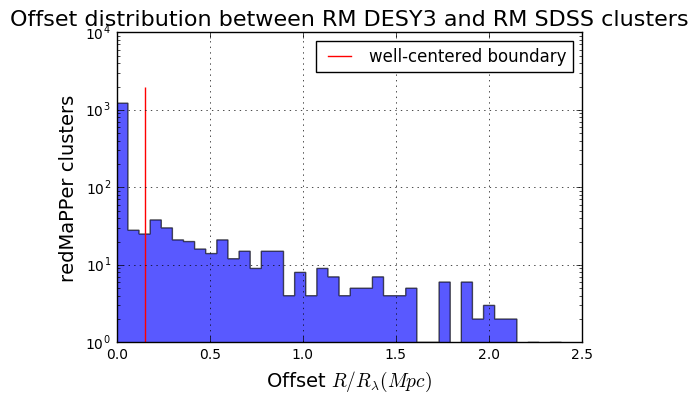

In [73]:
num_bins=40
plt.title('Offset distribution between RM DESY3 and RM SDSS clusters', fontsize=16)
plt.grid()
plt.hist(offset_array, num_bins, facecolor='blue', alpha=0.65, histtype='stepfilled')
line=plt.vlines(0.15,0,2000, 'r', label='well-centered boundary')
plt.ylabel(r'redMaPPer clusters', fontsize=14)
plt.xlabel(r'Offset $R/R_\lambda (Mpc)$', fontsize=14)
plt.yscale('log')
plt.legend()
#plt.xlabel(r'$R/R_{\lambda} (Mpc)$', fontsize=14)
#xlabel("Offset (h^-1Mpc)")
#title("Miscentering for SDSS only clusters in redshift range 0.1 < z < 0.35 in redMaPPer sample")
plt.show() 

This is a very preliminary and messy plot to demonstrate how to do an offset measurement to calibrate the miscentering systematic of the redMaPPer cluster finder. The red line denotes the boundary of 'well-centred' clusters. You might have noticed the distribution of offsets on the right of the red line appear consistently higher than in the published plot. This is because we have not yet taken the redshift of the clusters into account - only their angular separation in the sky. 

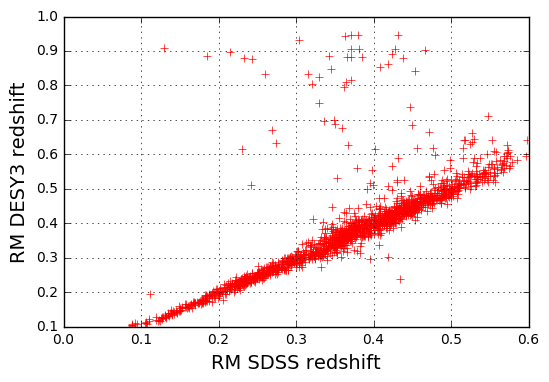

In [74]:
#Let's quickly look at the effect of redshift projections between two cluster samples

z_lambda_sdss=catalogue_data.field('Z_LAMBDA_1')
z_lambda_desy3=catalogue_data.field('Z_LAMBDA_2')

plt.grid()
plt.plot(z_lambda_sdss, z_lambda_desy3, 'r+')
#plt.ylim([0.0,16])
#plt.xlim([0.0,0.7])

plt.xlabel('RM SDSS redshift', fontsize=14)
plt.ylabel('RM DESY3 redshift', fontsize=14)
plt.legend(loc='best')
#plt.yscale('log')
#plt.xscale('log')
plt.show()

We see that broadly the RM redshifts from SDSS and DES agree in the matched clusters, but in a large number of cases, there is scatter. This means the SDSS cluster is considered to be the same as a DES cluster at a different redshift. We must take this into account when we produce our offset histograms in order to properly model the impact of miscentering. This is done using a redshift-dependent matching system. Once this is done, the histogram can be replotted and models can be fit to determine the centering performance of redMaPPer. 